In [1]:
import sys
sys.path.insert(0, '../python')
import cool_tigress as ct

\begin{equation}
    \xi_{\rm CR} = \xi_{\rm CR,sn} \times \left( \dfrac{\Sigma_{\rm SFR,40Myr}}{\Sigma_{\rm SFR,40Myr,sn}}\right) \times \left( \dfrac{\Sigma_{\rm gas}}{\Sigma_{\rm gas,sn}}\right)^{-1}
\end{equation}

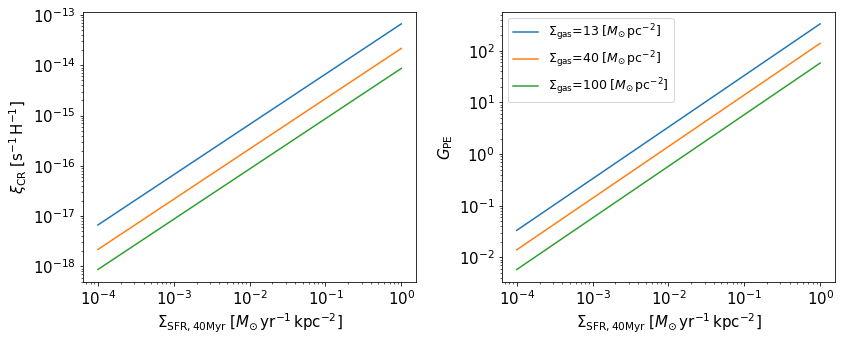

In [3]:
from scipy.special import expn

def J_over_JUV_inside_slab(tau, tau_SF):
    return 0.5/tau_SF*(2.0 - expn(2,0.5*tau_SF - tau) - expn(2,0.5*tau_SF + tau))

Sigma_gas = np.array([13.0, 40.0, 100.0])
Sigma_gas_label = [r'$\Sigma_{\rm gas}$=' + '{0:g}'.format(s) + 
                   r'$\;[M_{\odot}\,{\rm pc}^{-2}]$' for s in Sigma_gas]

Zd = 1.0
Sigma_gas0 = 13.0
Sigma_SFR0 = 3e-3
kappa_dust = 0.1*Zd # Dust opacity [pc^2/Msun]

tau_SF0 = Sigma_gas0*kappa_dust
ftau0 = J_over_JUV_inside_slab(0.0, tau_SF0)
Sigma_FUV0 = 17.0 # FUV luminosity surface density
xi_CR0 = 2e-16




Sigma_SFR40 = np.logspace(-4, 0)

mpl.rcParams['font.size'] = 15
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for s,l in zip(Sigma_gas,Sigma_gas_label):
    xi_CR = xi_CR0*(Sigma_gas0/s)*(Sigma_SFR40/Sigma_SFR0)
    plt.sca(axes[0])
    plt.loglog(Sigma_SFR40, xi_CR)
    
    tau_SF = s*kappa_dust
    ftau = J_over_JUV_inside_slab(0.0, tau_SF)
    Sigma_FUV = (Sigma_SFR40/Sigma_SFR0)*Sigma_FUV0
    G_PE = (Sigma_FUV/Sigma_FUV0)*(ftau/ftau0)
    
    plt.sca(axes[1])
    plt.loglog(Sigma_SFR40, G_PE, label=l)
    
plt.sca(axes[0])
plt.xlabel(r'$\Sigma_{\rm SFR,40{\rm Myr}}\;[M_{\odot}\,{\rm yr}^{-1}\,{\rm kpc}^{-2}]$')
plt.ylabel(r'$\xi_{\rm CR}\;[{\rm s}^{-1}\,{\rm H}^{-1}]$')

plt.sca(axes[1])
plt.xlabel(r'$\Sigma_{\rm SFR,40{\rm Myr}}\;[M_{\odot}\,{\rm yr}^{-1}\,{\rm kpc}^{-2}]$')
plt.ylabel(r'$G_{\rm PE}$')
plt.legend(fontsize='small')
plt.tight_layout()

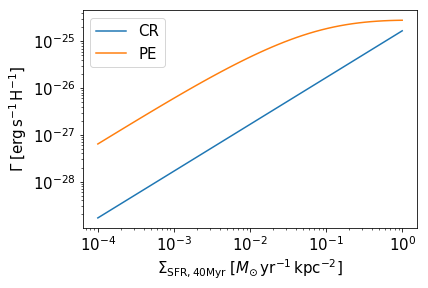

In [10]:
x_e = 1e-4
x_HI = 1.0
x_H2 = 0.0
nH = 1e2
T = 1e1
Zd = 1.0
hCR = ct.heatingCR(x_e, x_HI, x_H2, nH, xi_CR)
hPE = ct.heatingPE(x_e, nH, T, Zd, G_PE)
plt.loglog(Sigma_SFR40, hCR, label='CR')
plt.loglog(Sigma_SFR40, hPE, label='PE')
plt.xlabel(r'$\Sigma_{\rm SFR,40{\rm Myr}}\;[M_{\odot}\,{\rm yr}^{-1}\,{\rm kpc}^{-2}]$')
plt.ylabel(r'$\Gamma\;[{\rm erg}\,{\rm s}^{-1}\,{\rm H}^{-1}]$')
plt.legend()

In [11]:
hPE/hCR

array([38.0915888 , 38.04169217, 37.982019  , 37.91077625, 37.82589178,
       37.72499007, 37.6053734 , 37.46401118, 37.29754114, 37.10228568,
       36.87428644, 36.60935881, 36.30316651, 35.95131403, 35.54945211,
       35.09339001, 34.57920694, 34.00335601, 33.36275594, 32.65486929,
       31.87776943, 31.03020194, 30.11164788, 29.12239711, 28.06363794,
       26.93756644, 25.74751382, 24.49808438, 23.19529012, 21.84666159,
       20.46130935, 19.04990777, 17.62457453, 16.19862573, 14.78619964,
       13.40175945, 12.05950592, 10.77274919,  9.55330155,  8.41095547,
        7.35310233,  6.3845284 ,  5.50739958,  4.72142121,  4.02413868,
        3.41133221,  2.87745605,  2.41607697,  2.02027715,  1.68299821])

In [61]:
G_PE

array([5.80732695e-03, 7.00823943e-03, 8.45749177e-03, 1.02064388e-02,
       1.23170553e-02, 1.48641316e-02, 1.79379247e-02, 2.16473555e-02,
       2.61238693e-02, 3.15260932e-02, 3.80454573e-02, 4.59129778e-02,
       5.54074438e-02, 6.68652954e-02, 8.06925464e-02, 9.73791711e-02,
       1.17516467e-01, 1.41818008e-01, 1.71144928e-01, 2.06536439e-01,
       2.49246655e-01, 3.00789029e-01, 3.62989987e-01, 4.38053645e-01,
       5.28639915e-01, 6.37958758e-01, 7.69883935e-01, 9.29090267e-01,
       1.12121930e+00, 1.35307920e+00, 1.63288601e+00, 1.97055483e+00,
       2.37805106e+00, 2.86981452e+00, 3.46327104e+00, 4.17945001e+00,
       5.04372951e+00, 6.08673566e+00, 7.34542779e+00, 8.86440820e+00,
       1.06975026e+01, 1.29096674e+01, 1.55792916e+01, 1.88009745e+01,
       2.26888776e+01, 2.73807705e+01, 3.30429124e+01, 3.98759435e+01,
       4.81219951e+01, 5.80732695e+01])